In [1]:
include("PVCR.jl");

┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1192


# Residential cases

## Residential Case 1: Small PV System, this doesn't generate any injection into the grid

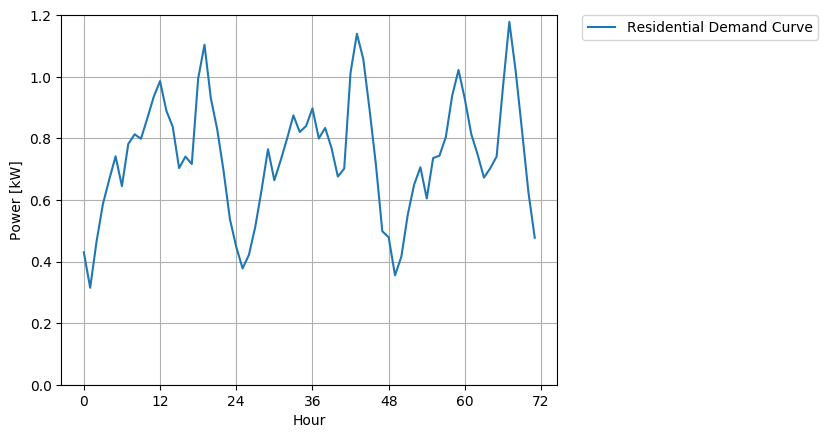

In [2]:
PVRes.capacity = 1.0
ts=simulate(residential, PVRes, 3);
plot(ts["demand_curve"], label = "Residential Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylim(0,1.2)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

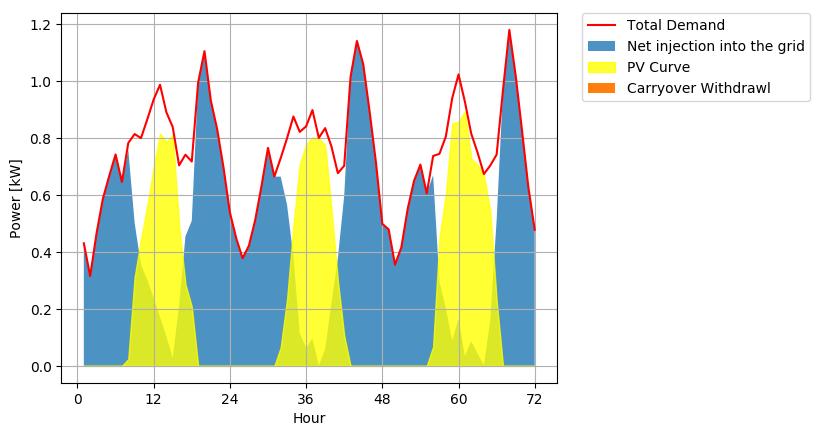

In [4]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 1

In [5]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy  | global_generation global_withdrawl global_allowance max_surplus  | carryover real_surplus
1 546.85 193.14  | 0.24 0.24 353.72  | 193.14 0.24 94.64 0.24  | 0.0 0.0
2 545.82 122.17  | 0.0 0.0 423.64  | 315.31 0.24 154.27 0.0  | 0.0 0.0
3 551.19 155.3  | 0.0 0.0 395.89  | 470.61 0.24 230.36 0.0  | 0.0 0.0
4 541.44 170.22  | 0.56 0.56 371.22  | 640.82 0.8 313.77 0.56  | 0.0 0.0
5 556.38 180.77  | 0.77 0.77 375.61  | 821.6 1.57 401.79 0.77  | 0.0 0.0
6 557.21 186.43  | 0.27 0.27 370.78  | 1008.02 1.84 492.36 0.27  | 0.0 0.0
7 539.39 155.26  | 0.04 0.04 384.13  | 1163.28 1.88 568.17 0.04  | 0.0 0.0
8 546.22 181.79  | 0.68 0.68 364.43  | 1345.07 2.56 657.21 0.68  | 0.0 0.0
9 537.01 172.24  | 0.0 0.0 364.77  | 1517.31 2.56 740.92 0.0  | 0.0 0.0
10 558.39 184.47  | 0.21 0.21 373.92  | 1701.78 2.77 831.31 0.21  | 0.0 0.0
11 559.92 167.87  | 0.0 0.0 392.05  | 1869.65 2.77 913.36 0.0  | 0.0 0.0
12 559.64 176.65  | 0.

### Billings case residential 1

In [6]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost | counterfactual_cost savings
118271.68 4.96 118276.64  | 140293.01 22016.37
126244.76 0.0 126244.76  | 140174.91 13930.15
123080.26 0.0 123080.26  | 140787.47 17707.21
120268.06 11.76 120279.82  | 139675.99 19396.17
120768.07 16.28 120784.36  | 141379.78 20595.42
120217.17 5.74 120222.91  | 141473.73 21250.82
121739.37 0.74 121740.12  | 139441.82 17701.7
119493.66 14.37 119508.04  | 140221.41 20713.38
119532.13 0.0 119532.13  | 139170.96 19638.82
120575.79 4.36 120580.15  | 141609.13 21028.98
122642.96 0.0 122642.96  | 141783.33 19140.36
121609.01 16.22 121625.23  | 141750.96 20125.73


## Residential Case 2: Medium Size PV System, produces some injection into the grid 

In [7]:
PVRes.capacity = 2.0
ts=simulate(residential, PVRes, 3);

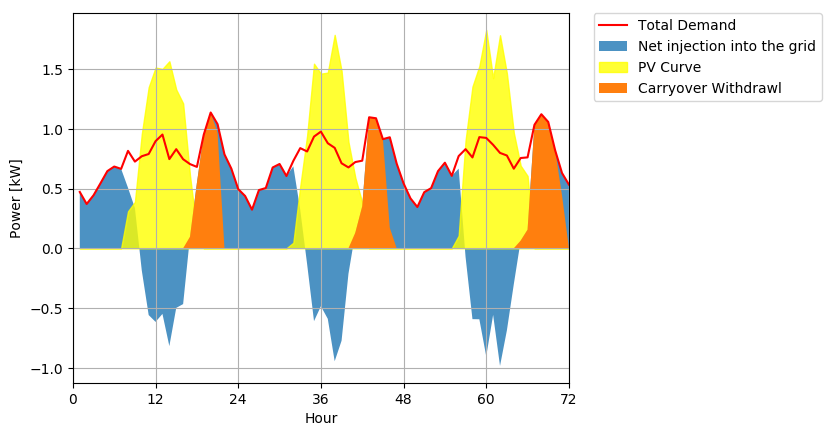

In [9]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
xlim(1,72)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 2

In [10]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy  | global_generation global_withdrawl global_allowance max_surplus  | carryover real_surplus
1 546.92 397.67  | 144.82 144.82 149.26  | 397.67 144.82 194.86 144.82  | 0.0 0.0
2 544.54 291.58  | 69.58 69.58 252.96  | 689.25 214.4 192.91 69.58  | 0.0 0.0
3 553.36 312.98  | 85.98 85.98 240.38  | 1002.23 300.38 276.7 85.98  | 0.0 0.0
4 538.81 319.93  | 89.5 89.5 218.88  | 1322.16 389.88 347.48 89.5  | 0.0 0.0
5 552.99 336.56  | 99.37 99.37 216.43  | 1658.73 489.25 422.9 99.37  | 0.0 0.0
6 554.65 342.97  | 115.53 115.53 211.68  | 2001.7 604.78 491.59 115.53  | 0.0 0.0
7 539.79 330.37  | 100.36 100.36 209.42  | 2332.07 705.13 537.94 100.36  | 0.0 0.0
8 547.62 341.58  | 103.15 103.15 206.04  | 2673.65 808.29 604.96 103.15  | 0.0 0.0
9 537.95 334.13  | 105.36 105.36 203.82  | 3007.78 913.65 665.53 105.36  | 0.0 0.0
10 555.96 349.09  | 99.53 99.53 206.87  | 3356.87 1013.17 731.22 99.53  | 0.0 0.0
11 557.47 329.32  | 

### Billings case residential 2

In [11]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost | counterfactual_cost savings
73253.87 3045.65 76299.52  | 140300.86 64001.34
84898.57 1463.16 86361.74  | 140030.0 53668.26
83510.76 1808.15 85318.91  | 141035.46 55716.56
81139.3 1882.23 83021.53  | 139375.68 56354.15
80868.74 2089.66 82958.4  | 140992.98 58034.58
80345.26 2429.58 82774.84  | 141182.34 58407.5
80095.76 2110.5 82206.27  | 139487.31 57281.04
79722.66 2169.31 81891.98  | 140380.42 58488.44
79478.13 2215.72 81693.85  | 139277.58 57583.74
79814.46 2093.1 81907.55  | 141331.69 59424.13
82162.56 2059.08 84221.64  | 141503.82 57282.18
79057.0 2608.56 81665.56  | 141968.66 60303.11


## Residential Case 3: Large PV System that generates multi-day carry over

In [12]:
PVRes.capacity = 4.0
ts=simulate(residential, PVRes, 3);

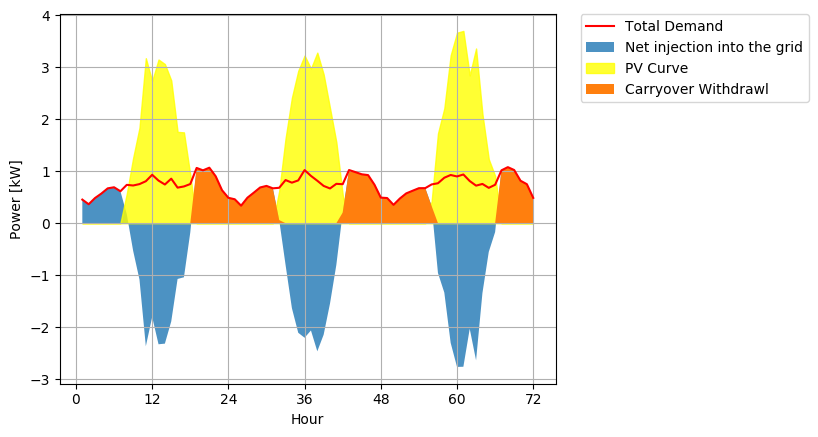

In [14]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 3

In [15]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy  | global_generation global_withdrawl global_allowance max_surplus  | carryover real_surplus
1 545.26 763.62  | 496.25 277.9 0.0  | 763.62 277.9 374.17 374.17  | 96.28 218.35
2 543.34 539.69  | 296.88 300.52 0.0  | 1303.31 578.41 360.73 360.73  | 60.21 92.63
3 552.48 560.51  | 314.39 306.36 0.0  | 1863.82 884.77 334.86 334.86  | 28.5 68.24
4 541.48 680.96  | 445.55 306.07 0.0  | 2544.78 1190.84 362.17 362.17  | 56.1 167.98
5 554.8 674.8  | 426.74 306.74 0.0  | 3219.57 1497.58 386.75 386.75  | 80.01 176.1
6 557.99 654.25  | 394.11 297.85 0.0  | 3873.83 1795.43 400.59 400.59  | 102.74 176.27
7 537.51 687.78  | 434.56 284.29 0.0  | 4561.6 2079.72 439.75 439.75  | 155.46 253.01
8 546.78 725.49  | 460.62 281.92 0.0  | 5287.09 2361.64 510.95 510.95  | 229.04 334.17
9 538.04 667.72  | 405.48 275.8 0.0  | 5954.81 2637.44 556.22 556.22  | 280.42 358.72
10 556.89 730.09  | 468.47 295.26 0.0  | 6684.9 2932.7 638.16 638

### Billings case residential 3

In [16]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost | counterfactual_cost savings
0.0 5844.15 5844.15  | 140111.74 134267.59
0.0 6319.9 6319.9  | 139892.19 133572.28
0.0 6442.73 6442.73  | 140934.37 134491.64
0.0 6436.68 6436.68  | 139680.06 133243.38
0.0 6450.65 6450.65  | 141198.76 134748.12
0.0 6263.88 6263.88  | 141563.31 135299.43
0.0 5978.54 5978.54  | 139227.48 133248.94
0.0 5928.68 5928.68  | 140284.6 134355.92
0.0 5800.1 5800.1  | 139288.17 133488.08
0.0 6209.38 6209.38  | 141437.27 135227.88
0.0 6044.35 6044.35  | 141549.31 135504.95
0.0 6072.7 6072.7  | 141790.53 135717.84


# Commercial consumer subject to commercial and small size industrial tariff cases

## Commercial case1: small PV system

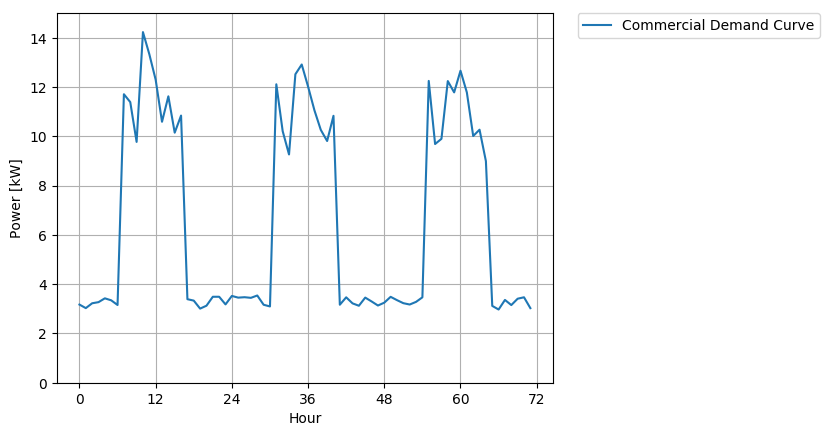

In [17]:
ts=simulate(commercial, PVComInd, 3);
plot(ts["demand_curve"], label = "Commercial Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylim(0,15)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [18]:
mean(commercial.peak_power)

13.847359136480511

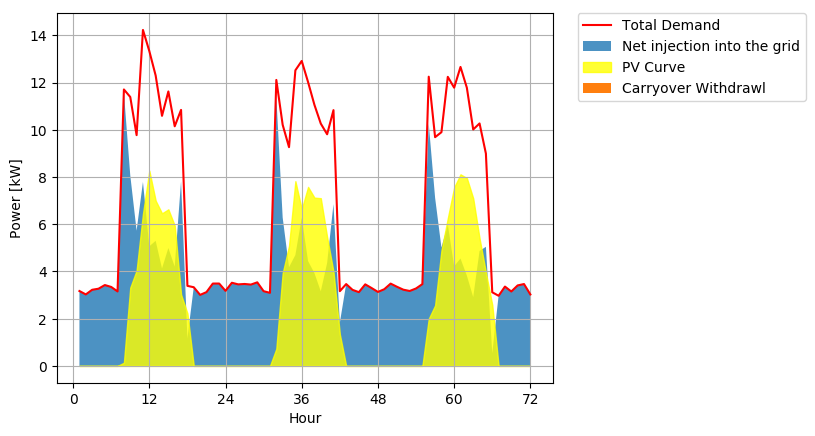

In [20]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [21]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy  | peak_power peak_demand  | global_generation global_withdrawl global_allowance max_surplus  | carry_over real_surplus
1 5001.22 1933.91  | 0.0 0.0 3067.31  | 14.9 10.19  | 1933.91 0.0 947.62 0.0  | 0.0 0.0
2 5102.18 1372.55  | 0.0 0.0 3729.63  | 16.86 12.66  | 3306.46 0.0 1620.17 0.0  | 0.0 0.0
3 4848.68 1425.56  | 0.0 0.0 3423.12  | 14.46 10.83  | 4732.02 0.0 2318.69 0.0  | 0.0 0.0
4 5016.17 1713.84  | 0.0 0.0 3302.33  | 15.38 11.04  | 6445.86 0.0 3158.47 0.0  | 0.0 0.0
5 5359.59 1732.96  | 0.0 0.0 3626.63  | 15.97 11.08  | 8178.82 0.0 4007.62 0.0  | 0.0 0.0
6 5185.33 1568.61  | 0.0 0.0 3616.72  | 15.98 11.07  | 9747.43 0.0 4776.24 0.0  | 0.0 0.0
7 4954.3 1717.54  | 0.0 0.0 3236.76  | 14.8 10.67  | 11464.97 0.0 5617.84 0.0  | 0.0 0.0
8 5018.92 1627.25  | 0.0 0.0 3391.67  | 14.83 10.1  | 13092.22 0.0 6415.19 0.0  | 0.0 0.0
9 4920.76 1564.13  | 0.0 0.0 3356.64  | 15.11 10.07  | 14656.35 0.0 7181.61 0.0  | 0

In [22]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_cost", " ", "counterfactual_demand_cost", " ", " | ", "savings_energy", "savings_demand")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_cost counterfactual_demand_cost  | savings_energysavings_demand
224281.62 0.0 224281.62 116631.48  | 365689.47 170541.94  | 141407.85 53910.46
272710.6 0.0 272710.6 144870.96  | 373071.29 192933.65  | 100360.69 48062.7
250298.44 0.0 250298.44 123925.86  | 354535.44 165550.87  | 104237.0 41625.01
241466.67 0.0 241466.67 126343.23  | 366782.46 176070.47  | 125315.79 49727.24
265179.02 0.0 265179.02 126862.81  | 391892.93 182739.83  | 126713.91 55877.03
264454.23 0.0 264454.23 126691.7  | 379151.15 182932.88  | 114696.92 56241.18
236672.08 0.0 236672.08 122139.9  | 362258.56 169373.82  | 125586.48 47233.91
247998.89 0.0 247998.89 115634.49  | 366983.68 169715.72  | 118984.79 54081.23
245437.31 0.0 245437.31 115207.12  | 359806.27 172964.07  | 114368.96 57756.95
220392.94 0.0 220392.94 114561.25  | 347259.32 160095.68  | 126866.38 45534.43
242131.98 0.0 242131.98 103164.99  | 361063.87 172812.16  | 1189

## Commercial case 2: medium PV system

In [23]:
PVComInd.capacity = 18.0
ts=simulate(commercial, PVComInd, 3);

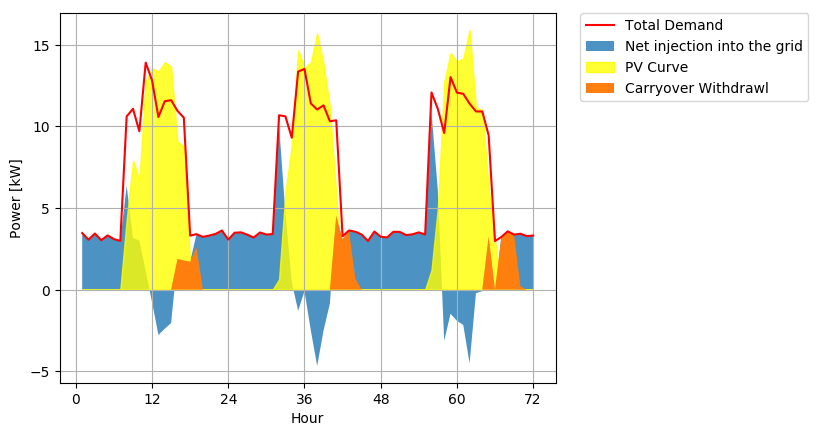

In [25]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [26]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy  | peak_power peak_demand  | global_generation global_withdrawl global_allowance max_surplus  | carry_over real_surplus
1 4972.75 3649.35  | 445.93 445.93 1323.4  | 14.81 5.73  | 3649.35 445.93 1788.18 445.93  | 0.0 0.0
2 5107.0 2339.62  | 23.85 23.85 2767.37  | 16.85 12.33  | 5988.97 469.78 2488.67 23.85  | 0.0 0.0
3 4851.16 2680.31  | 103.84 103.84 2170.85  | 14.46 10.79  | 8669.29 573.62 3778.17 103.84  | 0.0 0.0
4 5041.81 3136.81  | 208.52 208.52 1904.99  | 15.27 9.53  | 11806.1 782.15 5211.36 208.52  | 0.0 0.0
5 5363.02 3109.34  | 98.66 98.66 2253.68  | 15.76 8.78  | 14915.44 880.8 6526.42 98.66  | 0.0 0.0
6 5180.68 3252.4  | 142.65 142.65 1928.28  | 15.88 7.71  | 18167.84 1023.46 8021.44 142.65  | 0.0 0.0
7 4963.57 3409.65  | 292.98 292.98 1553.92  | 14.8 6.58  | 21577.49 1316.44 9549.51 292.98  | 0.0 0.0
8 5029.65 3262.41  | 201.76 201.76 1767.24  | 14.81 6.49  | 24839.89 1518.2 10855.11 201.76  | 0.0

In [27]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_cost", " ", "counterfactual_demand_cost", " ", " | ", "savings_energy", " savings_demand")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_cost counterfactual_demand_cost  | savings_energy savings_demand
160740.6 9377.87 170118.48 0.0  | 363607.72 169501.14  | 193489.24 169501.14
336125.05 501.63 336626.67 0.0  | 373423.5 192813.95  | 36796.83 192813.95
263671.55 2183.83 265855.38 0.0  | 354717.17 165555.11  | 88861.79 165555.11
231380.28 4385.26 235765.55 0.0  | 368656.83 174816.41  | 132891.28 174816.41
273732.15 2074.73 275806.88 0.0  | 392143.89 180444.96  | 116337.01 180444.96
234209.22 3000.03 237209.25 0.0  | 378811.64 181715.58  | 141602.39 181715.58
188739.47 6161.38 194900.85 0.0  | 362936.35 169415.69  | 168035.5 169415.69
214649.03 4242.98 218892.01 0.0  | 367767.8 169558.07  | 148875.79 169558.07
226645.19 4124.25 230769.43 0.0  | 359140.79 173680.5  | 128371.36 173680.5
179298.04 7603.99 186902.03 0.0  | 346560.7 162039.68  | 159658.68 162039.68
261279.44 2195.24 263474.67 0.0  | 362326.15 175019.66  | 98851.48 175019.66


## Commercial case 3: Large PV system

In [28]:
PVComInd.capacity = 28.0
ts=simulate(commercial, PVComInd, 3);

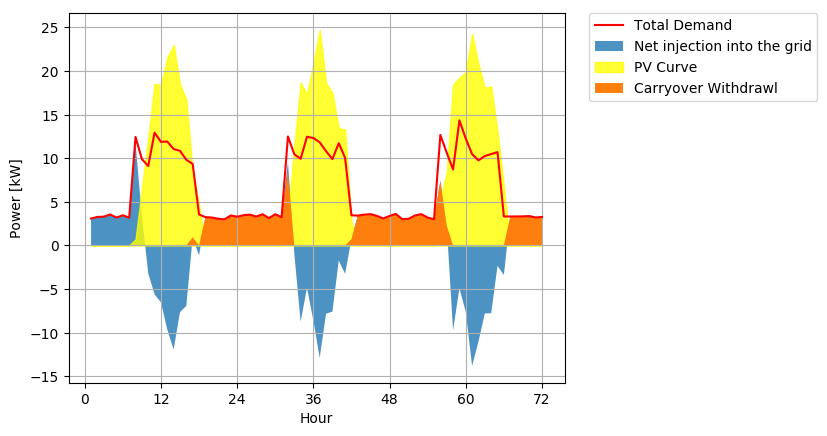

In [30]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [31]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy  | peak_power peak_demand  | global_generation global_withdrawl global_allowance max_surplus  | carry_over real_surplus
1 4976.03 5326.66  | 1861.6 1510.96 0.0  | 14.64 5.48  | 5326.66 1510.96 2610.06 1861.6  | 350.63 350.63
2 5111.97 3741.34  | 715.72 1066.35 1020.0  | 16.71 12.55  | 9068.0 2577.31 2932.36 1066.35  | 0.0 0.0
3 4860.81 4333.8  | 1297.45 1293.69 530.77  | 14.41 10.84  | 13401.8 3871.01 3989.57 1297.45  | 3.76 3.76
4 5015.73 4754.17  | 1621.3 1610.44 272.42  | 15.46 10.01  | 18155.97 5481.45 5025.42 1625.06  | 14.61 14.61
5 5350.16 4732.48  | 1192.41 1206.73 603.36  | 15.94 10.24  | 22888.45 6688.18 5733.9 1207.02  | 0.29 0.29
6 5198.89 4481.11  | 1355.15 1350.02 722.91  | 15.98 11.02  | 27369.56 8038.19 6722.91 1355.44  | 5.42 5.42
7 4972.85 4698.31  | 1365.12 1361.78 277.89  | 14.79 6.2  | 32067.88 9399.97 7675.06 1370.55  | 8.77 8.77
8 5009.96 4946.74  | 1562.59 1550.84 74.97  | 14.76 5.61 

In [32]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_cost", " ", "counterfactual_demand_cost", " ", " | ", "savings_energy", "savings_demand")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_cost counterfactual_demand_cost  | savings_energysavings_demand
0.0 31775.58 31775.58 0.0  | 363847.42 167570.94  | 332071.84 167570.94
123888.61 22425.31 146313.92 0.0  | 373787.08 191240.27  | 227473.16 191240.27
64466.91 27206.39 91673.31 0.0  | 355422.36 164951.79  | 263749.05 164951.79
33088.09 33867.56 66955.65 0.0  | 366750.28 176913.82  | 299794.64 176913.82
73284.17 25377.5 98661.67 0.0  | 391203.83 182447.38  | 292542.16 182447.38
87804.69 28390.9 116195.59 0.0  | 380142.91 182899.09  | 263947.32 182899.09
33752.04 28638.16 62390.21 0.0  | 363614.96 169288.46  | 301224.75 169288.46
9105.36 32614.18 41719.54 0.0  | 366328.24 168902.9  | 324608.7 168902.9
57353.88 29026.04 86379.92 0.0  | 358616.97 173464.92  | 272237.05 173464.92
0.0 30893.61 30893.61 0.0  | 347145.21 161486.4  | 316251.6 161486.4
17987.08 33330.55 51317.63 0.0  | 363091.31 174939.49  | 311773.68 174939.49
0.0 33460.93 3346

# Medium Voltage (TMT) cases, users are medium to large industrial consumers.

## TMT case 1: small PV system

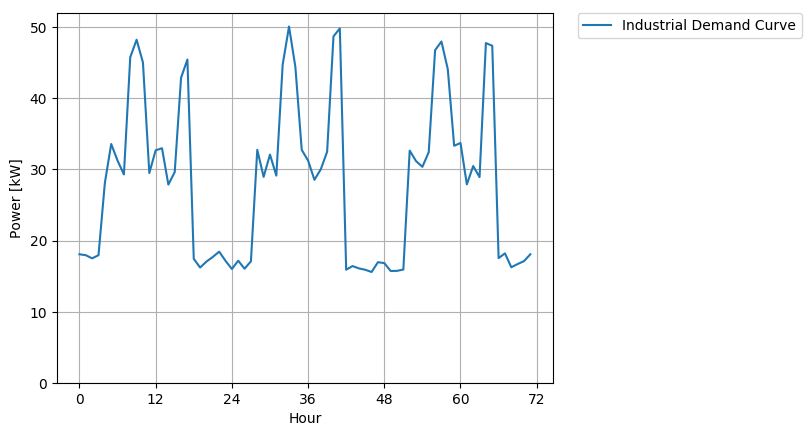

In [33]:
ts=simulate(mediumvoltage, PVTMT, 3);
plot(ts["demand_curve"], label = "Industrial Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ylim(0,52)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

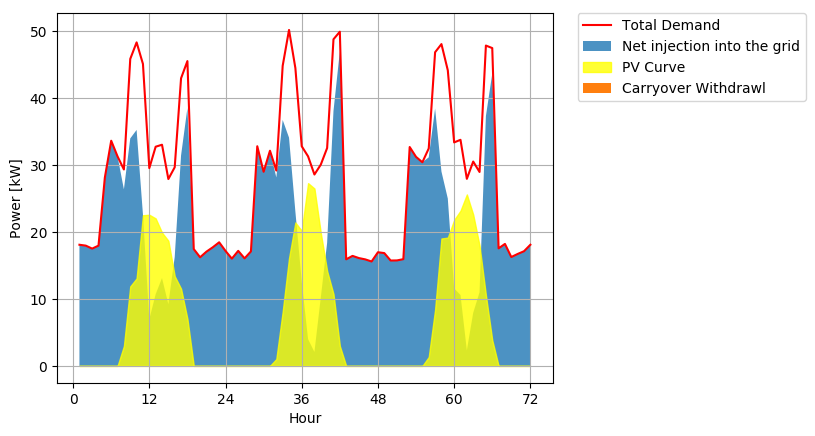

In [35]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [36]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy inyection_grid withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | global_generation global_withdrawl global_allowance max_surplus  | carry_over real_surplus
1 | 7202.37 8115.14 8115.14  | 5317.64 0.0 0.0  | 5073.82 4926.05 5742.31  | 0.0 0.0 0.0  | 0.0 0.0 0.0  | 5317.64 0.0 2605.64 0.0  | 0.0 0.0
2 | 6630.88 7436.8 7436.8  | 4113.39 0.0 0.0  | 4630.6 5323.69 5288.08  | 0.0 0.0 0.0  | 0.0 0.0 0.0  | 9431.04 0.0 4621.21 0.0  | 0.0 0.0
3 | 7228.39 8085.32 8085.32  | 4321.31 0.0 0.0  | 5480.32 5512.08 5746.66  | 0.0 0.0 0.0  | 0.0 0.0 0.0  | 13752.34 0.0 6738.65 0.0  | 0.0 0.0
4 | 7439.33 8446.4 8446.4  | 4936.31 0.0 0.0  | 5426.47 5522.95 5933.38  | 0.0 0.0 0.0  | 0.0 0.0 0.0  | 18688.65 0.0 9157.44 0.0  | 0.0 0.0
5 | 7213.26 8087.83 8087.83  | 5237.23 0.0 0.0  | 5022

In [37]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",        
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "savings_energy_cost_peak"," ",
        "savings_energy_cost_valley"," ",
        "savings_energy_cost_night"," ",  
         " | ",
        "savings_demand_cost_peak"," ",
        "savings_demand_cost_valley"," ",
        "savings_demand_cost_night"," ")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | savings_energy_cost_peak savings_energy_cost_valley savings_energy_cost_night  | savings_demand_cost_peak savings_demand_cost_valley savings_demand_cost_night 
314373.91 152658.21 128110.91  | 0.0  | 314373.91 152658.21 128110.91  | 446258.56 251488.32 181048.87  | 131884.65 98830.11 52937.96  | 0.0 0.0 0.0 
286912.16 164981.02 117977.05  | 0.0  | 286912.16 164981.02 117977.05  | 410849.21 230466.54 165915.09  | 123937.05 65485.52 47938.03  | 0.0 0.0 0.0 
339560.91 170819.2 128207.9  | 0.0  | 339560.91 170819.2 128207.9  | 447870.91 250564.0 180383.44  | 108310.01 79744.79 52175.54  | 0.0 0.0 0.0 
336224.35 171156.08 132373.65  | 0.0  | 336224.35 171156.08 132373.65  | 460940.73 261754.08 188439.29  | 124716.38 90598.0 

## TMT Case2: Medium PV System

In [38]:
PVTMT.capacity = 60
ts=simulate(mediumvoltage, PVTMT, 3);

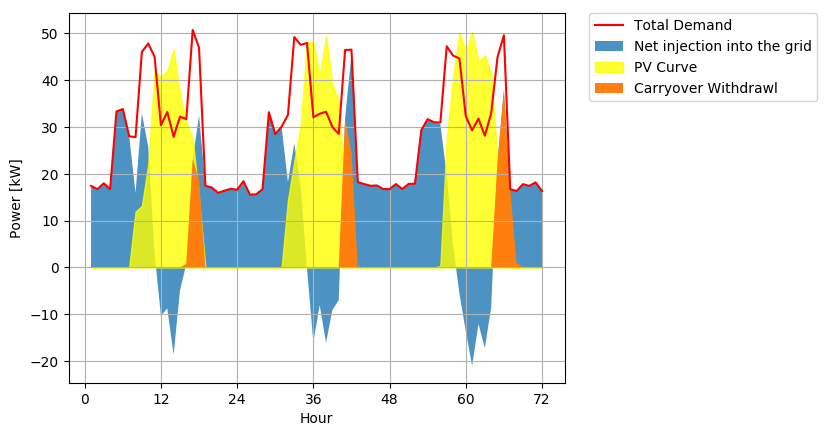

In [40]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [41]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy inyection_grid withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | global_generation global_withdrawl global_allowance max_surplus  | carry_over real_surplus
1 | 7197.92 8100.57 8100.57  | 10942.89 1374.25 1374.25  | 2019.41 2336.19 5692.34  | 0.0 0.0 0.0  | 0.0 0.0 0.0  | 10942.89 1374.25 5362.02 1374.25  | 0.0 0.0
2 | 6557.47 7483.85 7483.85  | 7765.53 737.71 737.71  | 3436.64 2839.16 5259.13  | 0.0 0.0 0.0  | 0.0 0.0 0.0  | 18708.42 2111.95 7792.88 737.71  | 0.0 0.0
3 | 7200.34 8085.72 8085.72  | 8872.07 786.01 786.01  | 3569.42 2844.58 5779.73  | 0.0 0.0 0.0  | 0.0 0.0 0.0  | 27580.48 2897.97 11402.48 786.01  | 0.0 0.0
4 | 7476.62 8408.3 8408.3  | 10515.91 835.79 835.79  | 3165.09 2203.93 5950.63  | 0.0 0.0 0.0  | 0.0 0.0 0.0  | 38096.39 3733.75 15769.27 835.79  

In [42]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",        
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "savings_energy_cost_peak"," ",
        "savings_energy_cost_valley"," ",
        "savings_energy_cost_night"," ",  
         " | ",
        "savings_demand_cost_peak"," ",
        "savings_demand_cost_valley"," ",
        "savings_demand_cost_night"," ")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | savings_energy_cost_peak savings_energy_cost_valley savings_energy_cost_night  | savings_demand_cost_peak savings_demand_cost_valley savings_demand_cost_night 
125122.81 72398.47 126996.02  | 28900.4  | 125122.81 72398.47 126996.02  | 445982.82 251036.81 180723.82  | 320860.01 178638.34 53727.8  | 0.0 0.0 0.0 
212933.97 87985.43 117331.25  | 15513.99  | 212933.97 87985.43 117331.25  | 406300.97 231924.39 166964.6  | 193367.0 143938.96 49633.35  | 0.0 0.0 0.0 
221161.29 88153.39 128945.89  | 16529.86  | 221161.29 88153.39 128945.89  | 446133.23 250576.53 180392.46  | 224971.94 162423.14 51446.58  | 0.0 0.0 0.0 
196108.83 68299.67 132758.5  | 17576.61  | 196108.83 68299.67 132758.5  | 463251.52 260573.25 187589.2  | 26714

## TMT Case 3: Large PV System

In [43]:
PVTMT.capacity = 100
ts=simulate(mediumvoltage, PVTMT, 3);

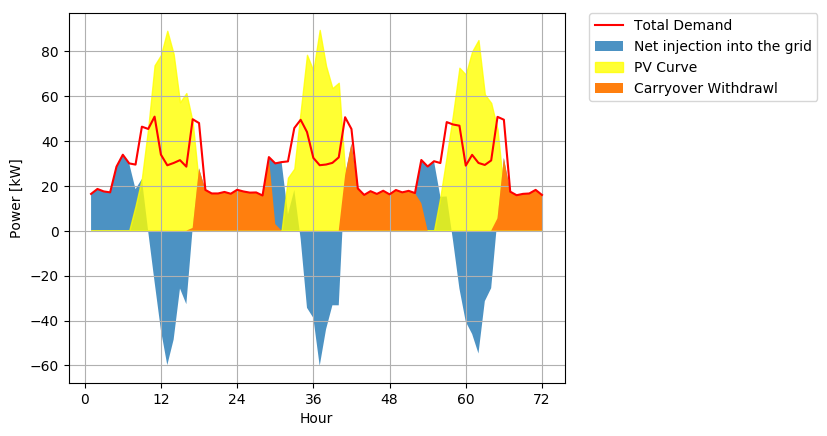

In [45]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [46]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy inyection_grid withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | global_generation global_withdrawl global_allowance max_surplus  | carry_over real_surplus
1 | 7187.89 8145.53 8145.53  | 19078.14 8507.19 8507.19  | 0.0 1695.68 289.93  | 0.0 0.0 0.0  | 0.0 0.0 0.0  | 19078.14 8507.19 9348.29 8507.19  | 0.0 0.0
2 | 6655.53 7466.44 7466.44  | 13525.19 4227.25 4227.25  | 0.0 1177.29 4657.86  | 0.0 0.0 0.0  | 0.0 0.0 0.0  | 32603.33 12734.44 7468.44 4227.25  | 0.0 0.0
3 | 7228.85 8123.34 8123.34  | 15633.38 4971.68 4971.68  | 0.0 1126.32 4314.32  | 0.0 0.0 0.0  | 0.0 0.0 0.0  | 48236.71 17706.12 10901.55 4971.68  | 0.0 0.0
4 | 7498.52 8455.88 8455.88  | 17034.08 6166.05 6166.05  | 0.0 1518.32 3304.49  | 0.0 0.0 0.0  | 0.0 0.0 0.0  | 65270.79 23872.17 14276.56 6166.05  |

In [47]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",        
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "savings_energy_cost_peak"," ",
        "savings_energy_cost_valley"," ",
        "savings_energy_cost_night"," ",  
         " | ",
        "savings_demand_cost_peak"," ",
        "savings_demand_cost_valley"," ",
        "savings_demand_cost_night"," ")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | savings_energy_cost_peak savings_energy_cost_valley savings_energy_cost_night  | savings_demand_cost_peak savings_demand_cost_valley savings_demand_cost_night 
0.0 52549.01 6468.25  | 178906.19  | 0.0 52549.01 6468.25  | 445361.46 252430.07 181726.85  | 445361.46 199881.07 175258.59  | 0.0 0.0 0.0 
0.0 36484.16 103916.78  | 88899.12  | 0.0 36484.16 103916.78  | 412376.82 231385.02 166576.31  | 412376.82 194900.86 62659.52  | 0.0 0.0 0.0 
0.0 34904.54 96252.54  | 104554.49  | 0.0 34904.54 96252.54  | 447899.67 251742.36 181231.75  | 447899.67 216837.82 84979.22  | 0.0 0.0 0.0 
0.0 47052.61 73723.23  | 129671.96  | 0.0 47052.61 73723.23  | 464608.3 262047.77 188650.72  | 464608.3 214995.16 114927.49  | 0.0 0.0 0.0 
0.0 36